# Eveline Srinivasan - 10801751

## Research question/interests

### Is there a significant age and gender disparity in the mental health of tech employees?

Many news articles and other forms of media, highlight gender disparities in various metrics such as income, position, representation etc. However, mental health disparities and systemic inequalities are not given equivalent attention. The little focus placed on these topics are often in such broadstrokes that they are meaningless in helping enact real changes in the workplace. They often rely on metrics such as job satisfaction or being accepted by coworkers, which highlights inequalities but does not point to a source, or a solution. Therefore I want to use this dataset, to hopefully determine and also highlight, the more nuanced relationships between gender and mental health within the tech industry.




In [11]:
#Importing
import pandas as pd
import numpy as np

## Milestone 2
---
Importing data from file:

In [12]:
# Importing Data 
rawData = pd.read_csv('../data/raw/dataRaw.csv')

## Milestone 3
---
### Task 1: Conduct Exploratory Data Analysis (EDA) on your dataset.

Columns available in the data set along which analysis can be performed:

In [13]:
#Printing columns of Data set.
print(rawData.columns)
len(rawData.columns)


Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


27

These 27 columns can be interpreted by comparing it with the questionnaire provided with the [data source](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey):

1. Timestamp of the individual's survey
2. Age of the individual
3. Gender of the individual
4. Country of origin of the individual
5. US state of origin of the individual if applicable
6. Whether or not the individual is self-employed
7. Whether the individual has a history of mental illness
8. Whether or not the individual has sought treatment for mental health
9. Whether the individual believes their mental health interferes with their work
10. The number of employees at the individual's company
11. Whether the individual works remotely (outside of an office) at least 50% of the time
12. Whether the individual's employer is a primarily tech company
13. Whether the individual's employer provides mental health benefits
14. Whether the individual is aware of their employer's mental health care options
15. Whether the individual's employer has ever discussed a mental health wellness program
16. Whether the individual's employer provides resources on how to seek help for mental health
17. Whether the individual is able to use company resources for mental health anonymously
18. The difficulty of taking mental health leaves at the individual's company
19. Whether the individual thinks discussing mental health with their employer will have negative connotations
20. Whether the individual thinks discussing physical health with their employer will have negative connotations
21. Whether the individual would be willing to discuss mental health with their coworkers
22. Whether the individual would be willing to discuss mental health with their direct supervisor
23. Whether the individual would bring up mental health issues during an interview with a possible employer
24. Whether the individual would bring up physical health issues during an interview with a possible employer
25. Whether the individual believes their employer takes mental health as seriously as physical health
26. Whether the individual has heard of or observed any negative consequences with mental health conditions in their workplace
27.  Any additional comments

### From here the columns of primary importance are:

1. Age of the individual
1. Gender of the Individual
1. Family History of Mental Illness

### Systemic factors of interest: 

1. Whether the individual's employer provides mental health benefits
1. Whether the individual thinks discussing mental health with their employer will have negative connotations
1. Whether the individual thinks discussing physical health with their employer will have negative connotations
1. Whether the individual believes their employer takes mental health as seriously as physical health

### Outcomes of Interest:

1. Whether or not the individual has sought treatment for mental health
1. Whether the individual believes their mental health interferes with their work
1. Whether the individual would be willing to discuss mental health with their coworkers
1. Whether the individual would be willing to discuss mental health with their direct supervisor

Particularly in relation to the question of gender. We want determine if there are disparties between various gender groups.

Since we are only conducting an exploratory analysis we will ignore systemic factors and see if we can identify patterns of interest within our data.

In [14]:
rawData.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

There are a lot of different ways people have written their genders, including misspellings that needs to be addressed. We will address those during the data cleaning phase in Task 2.
However despite the issues we can get a general idea of the gender distribution in out data.  
Note: Because of the large number of unique responses we are going to ignore all singularly unique responses.

<AxesSubplot:>

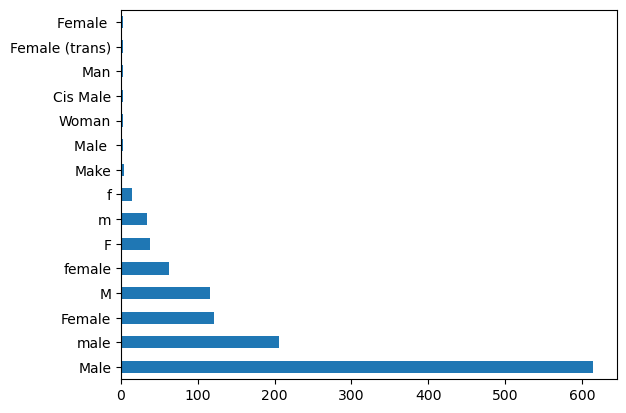

In [15]:
GenderCount = rawData.Gender.value_counts()
GenderCount[GenderCount>1].plot.barh()


Evidently there is a large Male-Bias in the data. Furthermore, Although there are many trans respondants and most of them have unique gender identites that cannot be dealt with indivdually, So we will address the data on gender data on two fronts: GenderAlignment (Masc Aligned/Femme Aligned/Non-Binary) and GenderType (Cis/Trans). These columns will be generated in Task 2.

Additionally, We need to know the overall pattern in the aspects of our data we are interested in to help our analysis of disparities later on.

<AxesSubplot:>

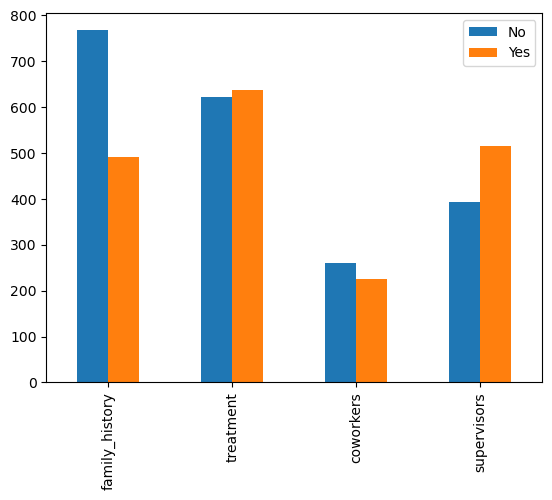

In [16]:
ValueCounts = pd.DataFrame(rawData.family_history.value_counts())
ValueCounts['treatment'] = rawData.treatment.value_counts()
ValueCounts['coworkers'] = rawData.coworkers.value_counts()
ValueCounts['supervisors'] = rawData.supervisor.value_counts()
   
ValueCounts.transpose().plot.bar()

Interesting that more people have had treatment for mental illness than those who have a family history of mental illnesses. Furthermore we can see an interesting pattern that people are more willing to talk about their mental health with their supervisors than their coworkers.

The next thing to look at is if respondants feel that their mental health has affected their work performance.

<AxesSubplot:>

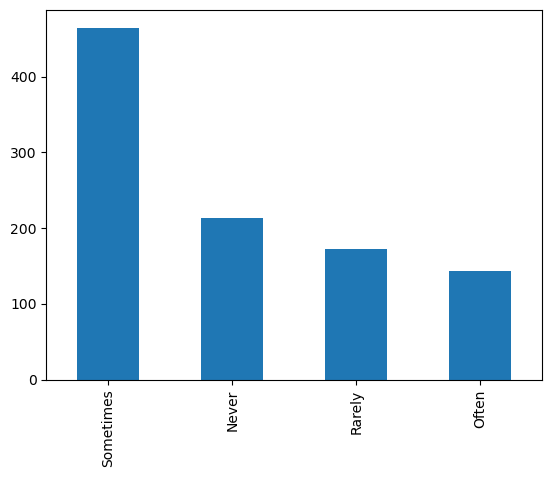

In [7]:
rawData.work_interfere.value_counts().plot.bar()

The vast majority, Roughly over 80% of the respondants feel that mental health has affected their work performance. This validates the need for better mental health support in the tech industry as a whole, irrespective of gender disparities.

Finally we also want to understand the age distribution of our data to understand the scope of our analysis, even if it proves irrelevent in our conclusions.

<AxesSubplot:xlabel='Age'>

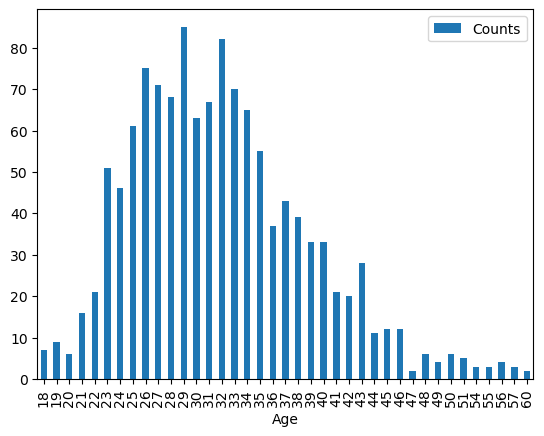

In [8]:
AgeCount = pd.DataFrame(rawData.Age.value_counts()).rename(columns={'Age':'Counts'}).sort_index(axis=0)
AgeCount[AgeCount['Counts']>1].plot.bar(xlabel="Age")

As we can see there is a significant skew towards 25-35 year olds with a sizeable middle aged population.

### Task 2 : Setting up an "Analysis Pipeline"
---
First we need to load and process the data. 
  1. Remove unused columns
  1. Account for misspelled Gender Data
  1. Remove invalid ages outside the range 18 to 100.
  1. Generate Gender Identity and Type data

In [9]:
rawDF= pd.read_csv('../data/raw/dataRaw.csv') # Loading Raw Data into dataframe

# Removing columns that is not relevant to our analysis
skimmedDF= rawDF[['Age','Gender','family_history','benefits','mental_health_consequence','phys_health_consequence','mental_vs_physical','treatment','work_interfere','coworkers','supervisor']]

# Dictionary that maps all values of gender to more managable form. 
# Prefix T = Trans/Non Cis ; Gendermarker is based on Masc-Femme Alignment.
# NB is implied trans and neither Masc or Femme. NA is used for junk responses.
genderDict :dict = {'Female':'F','Male':'M','male':'M','M':'M','m':'M','Male-ish':'TM','maile':'M','Trans-female':'TF',
                        'Cis Female':'F','F':'F','something kinda male?':'TM','Cis Male':'M','Woman':'F','f':'F','Mal':'M',
                        'Male (CIS)':'M','queer/she/they':'TF','non-binary':'NB','Femake':'F','woman':'F','Make':'M','Nah':'NB',
                        'All':'NB','Enby':'NB','fluid':'NB','Genderqueer':'NB','Female ':'F','Androgyne':'NB','Agender':'NB',
                        'cis-female/femme':'F','Guy (-ish) ^_^':'TM','male leaning androgynous':'TM','Male ':'M','Man':'M',
                        'Trans woman':'TF','msle':'M','Neuter':'NB','Female (trans)':'TF','queer':'NB','Female (cis)':'F',
                        'Mail':'M','cis male':'M','A little about you':'NA','Malr':'M','p':'NA','femail':'F','Cis Man':'M',
                        'ostensibly male, unsure what that really means':'TM'}

#Replacing Gender values according to dictionary
genderDF = skimmedDF.replace({'Gender':genderDict})

#Getting the indexes of Age values that are invalid
invalidAgeList = list(genderDF.loc[(genderDF['Age'].astype('int') < 18) | (genderDF['Age'].astype('int') > 100)].index)
#Replacing Invalid Values with 'NA'
genderDF.loc[invalidAgeList,'Age'] = np.nan

#Rename for clarity
cleanedDF = genderDF

#Now that the data is cleaned up we need to generate the column GenderAlignment and GenderType columns
#List of condtions 
conditions= [(cleanedDF['Gender'] == 'NB'),   
             (cleanedDF['Gender'] == 'TF'),
             (cleanedDF['Gender'] =='TM'),
             (cleanedDF['Gender'] == 'M'),
             (cleanedDF['Gender'] == 'F'),
             (cleanedDF['Gender'] == 'NA')]

#list of corresponding values
gAlignmentValues = ['NBA','FA','MA','MA','FA','NA']
gTypeValues = ['Trans','Trans','Trans','Cis','Cis','NA']

#generating columns using npselect
cleanedDF['gender_alignment'] = np.select(conditions, gAlignmentValues, default='NA')
cleanedDF['gender_type'] = np.select(conditions, gTypeValues, default='NA')

#rename for clarity
processedData= cleanedDF

#Saving Cleaned Data for ease
processedData.to_csv('../data/processed/eSrinivasanResearchQuestionData.csv',index=False)

#Printing Data frame to show end Result
processedData

,Age,Gender,family_history,benefits,mental_health_consequence,phys_health_consequence,mental_vs_physical,treatment,work_interfere,coworkers,supervisor,gender_alignment,gender_type
0,37.0,F,No,Yes,No,No,Yes,Yes,Often,Some of them,Yes,FA,Cis
1,44.0,M,No,Don't know,Maybe,No,Don't know,No,Rarely,No,No,MA,Cis
2,32.0,M,No,No,No,No,No,No,Rarely,Yes,Yes,MA,Cis
3,31.0,M,Yes,No,Yes,Yes,No,Yes,Often,Some of them,No,MA,Cis
4,31.0,M,No,Yes,No,No,Don't know,No,Never,Some of them,Yes,MA,Cis
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26.0,M,No,No,No,No,Don't know,Yes,NaN,Some of them,Some of them,MA,Cis
1255,32.0,M,Yes,Yes,No,No,Yes,Yes,Often,Some of them,Yes,MA,Cis
1256,34.0,M,Yes,Yes,Yes,Yes,No,Yes,Sometimes,No,No,MA,Cis
1257,46.0,F,No,No,Yes,No,No,No,NaN,No,No,FA,Cis


## Task 3 - Method Chaining and writing Python programs
---


In [18]:
import project_functions3 as pf3
cleanedDF = pf3.load_and_process('../data/raw/dataRaw.csv')
cleanedDF

,Age,Gender,family_history,benefits,mental_health_consequence,phys_health_consequence,mental_vs_physical,treatment,work_interfere,coworkers,supervisor,gender_alignment,gender_type
0,37.0,F,No,Yes,No,No,Yes,Yes,Often,Some of them,Yes,FA,Cis
1,44.0,M,No,Don't know,Maybe,No,Don't know,No,Rarely,No,No,MA,Cis
2,32.0,M,No,No,No,No,No,No,Rarely,Yes,Yes,MA,Cis
3,31.0,M,Yes,No,Yes,Yes,No,Yes,Often,Some of them,No,MA,Cis
4,31.0,M,No,Yes,No,No,Don't know,No,Never,Some of them,Yes,MA,Cis
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26.0,M,No,No,No,No,Don't know,Yes,NaN,Some of them,Some of them,MA,Cis
1255,32.0,M,Yes,Yes,No,No,Yes,Yes,Often,Some of them,Yes,MA,Cis
1256,34.0,M,Yes,Yes,Yes,Yes,No,Yes,Sometimes,No,No,MA,Cis
1257,46.0,F,No,No,Yes,No,No,No,NaN,No,No,FA,Cis
